In [1]:
!pip list

Package                      Version
---------------------------- -------------------
absl-py                      1.0.0
asttokens                    2.0.5
astunparse                   1.6.3
backcall                     0.2.0
cachetools                   5.1.0
certifi                      2021.10.8
charset-normalizer           2.0.12
colorama                     0.4.4
cycler                       0.11.0
debugpy                      1.6.0
decorator                    5.1.1
entrypoints                  0.4
executing                    0.8.3
flatbuffers                  1.12
fonttools                    4.33.3
gast                         0.4.0
google-auth                  2.6.6
google-auth-oauthlib         0.4.6
google-pasta                 0.2.0
grpcio                       1.46.1
h5py                         3.6.0
idna                         3.3
ipykernel                    6.13.0
ipython                      8.3.0
jedi                         0.18.1
jupyter-client               7.3.1

You should consider upgrading via the 'C:\Users\Ethan\Desktop\code\ImageClassification\ImageClassification\Scripts\python.exe -m pip install --upgrade pip' command.


In [3]:
import tensorflow as tf
import os

In [22]:
import cv2
import imghdr

In [76]:
data_dir = 'data'

In [77]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [78]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image with incorrect extension {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

Image with incorrect extension data\cat\01-cat-questions-nationalgeographic_1228126_4x3.jpg
Image with incorrect extension data\cat\02-cat-training-NationalGeographic_1484324_3x4.jpg
Image with incorrect extension data\cat\1200px-Cat_November_2010-1a.jpg
Image with incorrect extension data\cat\1628396465_cat-people.jpg
Image with incorrect extension data\cat\1800x1200_cat_relaxing_on_patio_other.jpg
Image with incorrect extension data\cat\black-cat-back.jpg
Image with incorrect extension data\cat\cat-behaviour.jpg
Image with incorrect extension data\cat\cat-toes-paw-number-paws-tiger-tabby.jpg
Image with incorrect extension data\cat\chef_cat_1644406489060_1644406507709.jpg
Image with incorrect extension data\cat\cs-pet-health-cat-exercises-1440x810.jpg
Image with incorrect extension data\cat\domestic-cat_thumb_square.jpg
Image with incorrect extension data\cat\eff84c687e50d533f210c2582ffd570142-31-cat-food.jpg
Image with incorrect extension data\cat\h5mk7js_cat-generic_625x300_28_Augus

In [24]:
import numpy as np
from matplotlib import pyplot as plt

In [79]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 211 files belonging to 2 classes.


In [26]:
data_iterator = data.as_numpy_iterator()

In [27]:
batch = data_iterator.next()

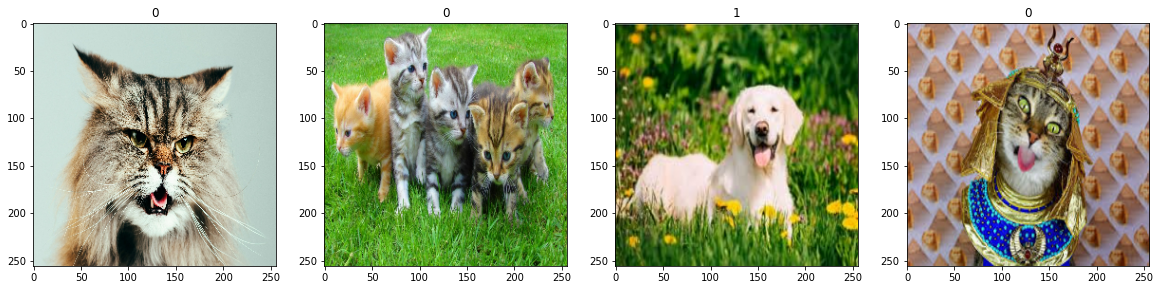

In [34]:
#0 -- CAT
#1 -- DOG

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [80]:
data = data.map(lambda x,y: (x/255, y))

In [81]:
scaled_iterator = data.as_numpy_iterator()

In [82]:
batch = scaled_iterator.next()

In [83]:
batch[0].max()

1.0

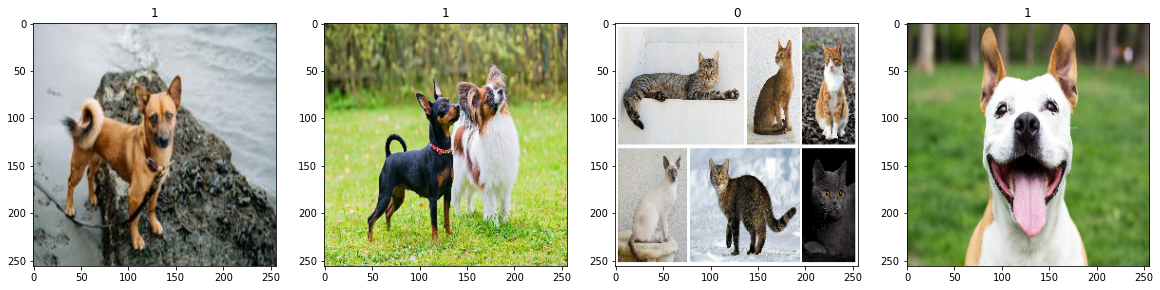

In [57]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [93]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [98]:
train_size + val_size + test_size
len(data)

7

In [99]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [102]:
len(test)

1

In [104]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [105]:
model = Sequential()

In [106]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [107]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [109]:
logdir='logs'

In [110]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [112]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 5s 955ms/step - loss: 1.0109 - accuracy: 0.6328 - val_loss: 0.7041 - val_accuracy: 0.3906
Epoch 2/20
4/4 [==============================] - 5s 930ms/step - loss: 0.6636 - accuracy: 0.5703 - val_loss: 0.5848 - val_accuracy: 0.7188
Epoch 3/20
4/4 [==============================] - 5s 934ms/step - loss: 0.6129 - accuracy: 0.6641 - val_loss: 0.5894 - val_accuracy: 0.6562
Epoch 4/20
4/4 [==============================] - 5s 932ms/step - loss: 0.5899 - accuracy: 0.6719 - val_loss: 0.5451 - val_accuracy: 0.7500
Epoch 5/20
4/4 [==============================] - 5s 936ms/step - loss: 0.5508 - accuracy: 0.7188 - val_loss: 0.5320 - val_accuracy: 0.6719
Epoch 6/20
4/4 [==============================] - 5s 937ms/step - loss: 0.6429 - accuracy: 0.6016 - val_loss: 0.5821 - val_accuracy: 0.7188
Epoch 7/20
4/4 [==============================] - 5s 932ms/step - loss: 0.5160 - accuracy: 0.8516 - val_loss: 0.5109 - val_accuracy: 0.6562
Epoch 8/20
4/4 [====

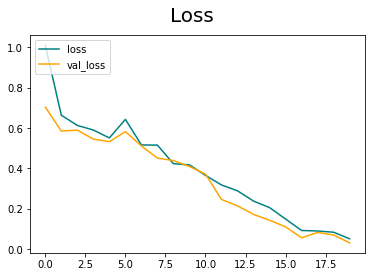

In [114]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

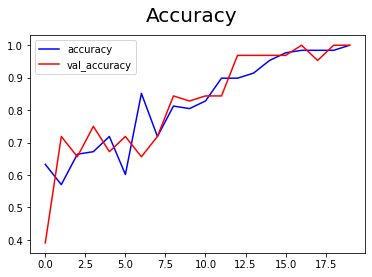

In [116]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='blue', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='red', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [118]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [119]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [172]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [173]:
print(f'Precision: {pre.result().numpy()} Recall: {re.result().numpy()} Accuracy: {acc.result().numpy()}')

Precision: 1.0 Recall: 1.0 Accuracy: 1.0


In [122]:
import cv2

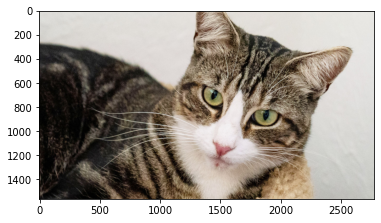

In [167]:
img = cv2.imread('cattest4.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

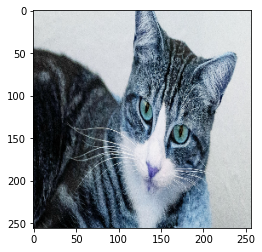

In [168]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [169]:
yhat = model.predict(np.expand_dims(resize/255, 0))

In [170]:
yhat

array([[0.14209488]], dtype=float32)

In [171]:
if yhat > 0.5:
    print(f'The model predicts the image to be a DOG.')
else:
    print(f'The model predicts the image to be a CAT.')

The model predicts the image to be a CAT.


In [174]:
from tensorflow.keras.models import load_model

In [175]:
model.save(os.path.join('models','dogvscatmodel.h5'))

In [2]:
arr = ['r', 'g', 'b', 'y']

In [3]:
arr = arr.as_numpy_iterator()

AttributeError: 'list' object has no attribute 'as_numpy_iterator'